# Lab 00: Football Fourth Down Decisions

---
author: Jakub Szumny
date: August 30, 2024
embed-resources: true
---

## Introduction

For this lab I was tasked with creating a model that estimates the probability than an attempt to convert a fourth down is successful, given game-state information such as yards-to-go, yards-to-goal, and the type of play (run or pass) considered. I recieved the data for this lab from the lab instructions. The data was also already heavily preprocessed for this lab.

## Methods

In [1]:
# installing packages
%pip install --upgrade pip
%pip install \
    joblib \
    numpy \
    scipy \
    pandas \
    pyarrow \
    matplotlib \
    seaborn \
    scikit-learn

Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.


### Data

In [15]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load data
football_train = pd.read_parquet("https://cs307.org/lab-00/data/football-train.parquet")
football_test = pd.read_parquet("https://cs307.org/lab-00/data/football-test.parquet")

In [5]:
football_train

,togo,yardline,converted,play_type
0,5.0,20.0,Yes,Pass
1,2.0,23.0,Yes,Pass
2,1.0,70.0,Yes,Run
3,3.0,3.0,Yes,Pass
4,1.0,36.0,No,Run
...,...,...,...,...
1985,11.0,24.0,No,Pass
1986,10.0,48.0,No,Pass
1987,2.0,40.0,Yes,Pass
1988,1.0,21.0,No,Pass


In [22]:
# summary statistics
print("Num of Features: ", len(football_train.columns))
print("Num not converted: ", len(football_train[football_train["converted"] == "No"]))
print("Num converted: ", len(football_train[football_train["converted"] == "Yes"]))
print("Proportion No: ", len(football_train[football_train["converted"] == "No"]) / len(football_train))
print("Proportion Yes: ", len(football_train[football_train["converted"] == "Yes"]) / len(football_train))

Num of Features:  4
Num not converted:  960
Num converted:  1030
Proportion No:  0.4824120603015075
Proportion Yes:  0.5175879396984925


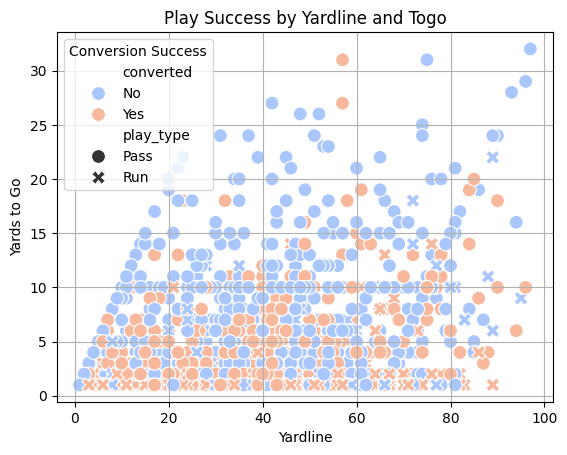

In [16]:
# visualizations

sns.scatterplot(data=football_train, x='yardline', y='togo', hue='converted', palette='coolwarm', style='play_type', s=100)
plt.title('Play Success by Yardline and Togo')
plt.xlabel('Yardline')
plt.ylabel('Yards to Go')
plt.legend(title='Conversion Success')
plt.grid(True)
plt.show()


Based on this visualization we can see the more yards to go the less this play is ran, and the farther the yardline, the higher the success rate.

### Models

In [17]:
# process data for ML
# create X and y for train
X_train = football_train.drop(columns=["converted"])
X_train = pd.get_dummies(X_train, dtype=float, drop_first=True)
y_train = football_train["converted"]

# create X and y for test
X_test = football_test.drop(columns=["converted"])
X_test = pd.get_dummies(X_test, dtype=float, drop_first=True)
y_test = football_test["converted"]

In [18]:
# train models
# import random forest model
from sklearn.ensemble import RandomForestClassifier

# initialize model
mod = RandomForestClassifier(n_estimators=25, random_state=42)

# fit model
_ = mod.fit(X_train, y_train)

## Results

In [19]:
# report model metrics
accuracy = mod.score(X_test, y_test)
print(accuracy)

0.5811320754716981


From this model, we have achieved a astonishing 58% accuracy.

In [15]:
from joblib import dump
dump(mod, "fourth-down.joblib")

['fourth-down.joblib']

## Discussion

This model definitely could be better, but it is solid nonetheless to make a 58% accurate prediction based on if the play fails or not. We this in our model metrics code. It is accurate with the visualizations and the data. I don't believe I would use this model in a real world scenario, because I don't believe about 50% chance of working or not is worth using a model for, instead of just guessing myself.

I believe that if this model was used in 2024, it would have similar performance, but different nonetheless. I believe this is because football stats change even drastically every year, so it could possibly just fail if not trained on accurate data.

### Conclusion

To conclude, we have achieved our goal of creating a model that estimates the probability than an attempt to convert a fourth down is successful, given game-state information such as yards-to-go, yards-to-goal, and the type of play (run or pass) considered. Although the model is only 58% accuracy, it is a good start nonetheless. As stated in the discussion, I would not personally use this model, as it is only about a 50% chance of being correct, and I feel that my own intuition could possibly even help me more.